In [31]:
import pandas as pd
import seaborn as sb
import numpy as np
import os
import matplotlib.pyplot as mp
from scipy.stats import binom, nbinom, t, f , norm, poisson, chi2

In [ ]:
# rvs = randon variate sample, vai gerar numeros aleatorios de acordo com uma distribuição
# fazer usando orientação a objetos, funcoes 'def', ou usando apenas 'IFs'?
# usar seaborn que é mais fácil ou matplotlib que é mais elaborado?
# usar 'Dash' para storytelling? 'pygame'? precisa-se de algo similar ao Rshiny
# fazer arquivo executável ou um link web?


In [52]:
# classe distribuição
class Distribuicao:
    def __init__(self, tipo:str, parametro1:float, parametro2:float, parametro3:float ):
        self.tipo = tipo
        self.parametro1 = parametro1
        self.parametro2 = parametro2
        self.parametro3 = parametro3
    
    def gerar_amostra(self):
        if self.tipo == 'binom':
            dist_binomial = binom(self.parametro1, self.parametro2)
            amostra = dist_binomial.rvs(size = self.parametro3)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')
            
            print('essa distribuicao é binomial')
        

        elif self.tipo == 'nbinom':            
            dist_nbinomial = nbinom(self.parametro1, self.parametro2)
            amostra = dist_nbinomial.rvs(size = self.parametro3)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')

            print('essa distribuicao é binomial negativa')

                
        elif self.tipo == 'poisson':            
            dist_poisson = poisson(self.parametro1)
            amostra = dist_poisson.rvs(size = self.parametro2)
            print(amostra)
            mp.hist(amostra, bins=10)
            mp.xlabel('valores')
            mp.ylabel('frequencia')

            print('essa distribuicao é poisson')

        
           

[46 47 46 55 42 47 53 53 54 46 56 55 48 58 47 52 44 54 48 45 57 51 43 51
 49 43 52 57 45 45 54 51 53 37 55 55 45 45 53 52 47 42 48 56 49 45 56 47
 52 53 59 57 57 56 51 52 54 53 45 50 54 56 52 47 50 46 57 49 52 50 52 51
 58 51 45 50 56 42 47 52 54 48 61 50 47 47 47 46 54 49 46 58 56 34 44 51
 58 49 41 45]
essa distribuicao é binomial


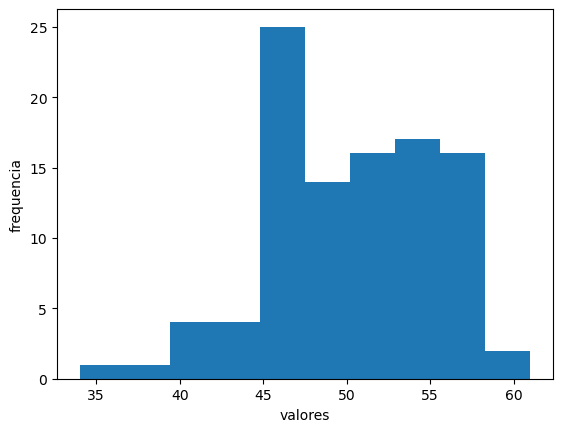

In [53]:
distribuicao = Distribuicao(tipo = 'binom', parametro1 = 100, parametro2 = 0.5 , parametro3 = 100)
distribuicao.gerar_amostra()